# Titanic Dataset
1. Understand the shape of the data (Histogram, Box-Plots)
2. Data Cleaning
3. Data Exploration
4. Feature Engineering
5. Data Processing for Model
6. Basic Model Building
7. Model Tuning
8. Ensemble Model Building
9. Evaluation

## Understanding the shape of the data

In [64]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
print('Sucessfully Imported')

Sucessfully Imported


In [65]:
## loading the dataset
df = pd.read_csv('Titanic_train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [66]:
## columns of the dataset
columns = df.columns
print(f'The columns of the dataset are \n {columns}')

The columns of the dataset are 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [67]:
## shape of the dataset
print(f'The shape of the dataset is {df.shape}')
print(f'There are {df.shape[0]} rows')
print(f'and {df.shape[1]} columns')

The shape of the dataset is (891, 12)
There are 891 rows
and 12 columns


In [68]:
## statistical report for the numerical columns in the dataset
df.select_dtypes(include=['int64','float64']).describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [69]:
## Seeing the characteristics of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
## deferintiating the numerical and categorical values
num_cols = df.select_dtypes(include=['int64','float64'])
cat_cols = df.select_dtypes(exclude=['int64','float64'])
print(f'The number of numerical columns are {len(num_cols.columns)}')
print(f'The number of numerical columns are {len(cat_cols.columns)}')

The number of numerical columns are 7
The number of numerical columns are 5


## Numerical Columns

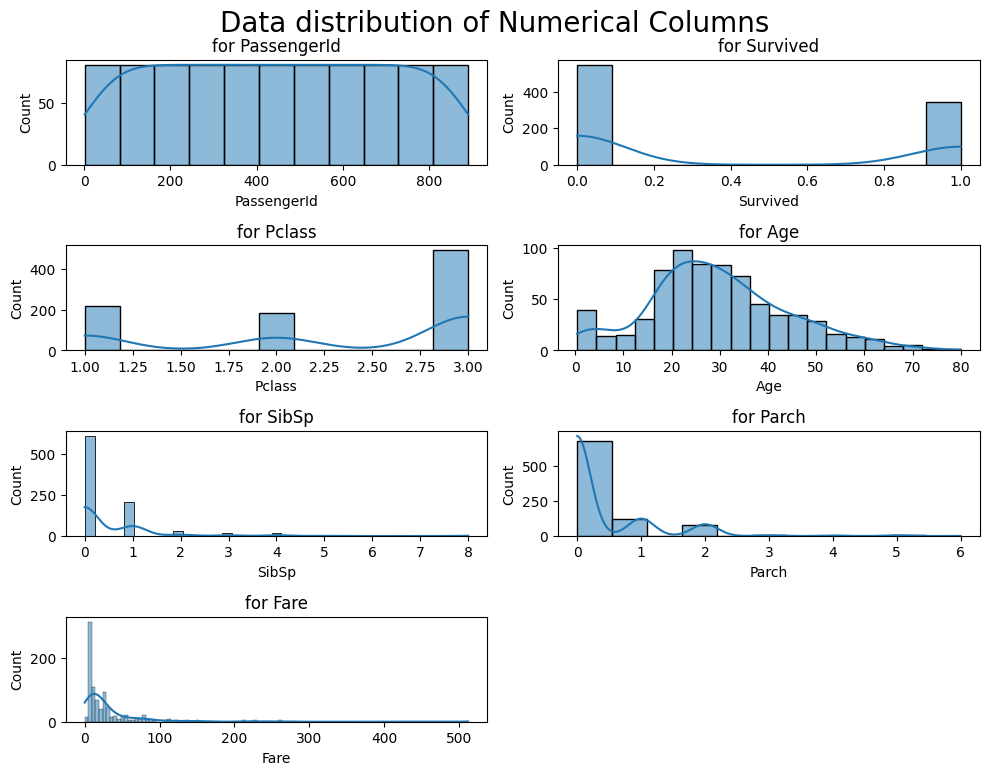

In [71]:
## Seeing the data distribution for the numerical columns
total_cols = len(num_cols.columns)
plt.figure(figsize=(10,15))
plt.suptitle('Data distribution of Numerical Columns', fontsize=20)
for idx, num in enumerate(num_cols, 1):
    plt.subplot(8, 2, idx)
    sns.histplot(data=num_cols, x=num, kde=True)
    plt.title(f'for {num}')
plt.tight_layout()
plt.show()

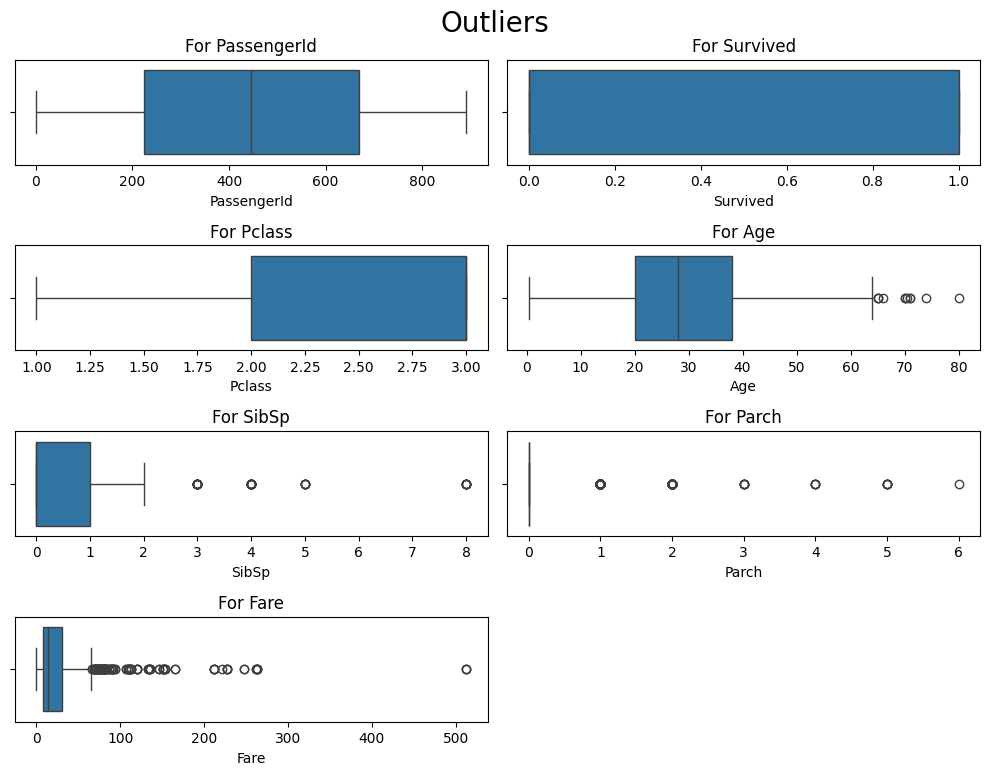

In [72]:
## checking for the outliers
plt.figure(figsize=(10,15))
plt.suptitle('Outliers', fontsize=20)
for idx, num in enumerate(num_cols, 1):
    plt.subplot(8, 2, idx)
    sns.boxplot(data=num_cols, x=num)
    plt.title(f'For {num}')
plt.tight_layout()
plt.show()

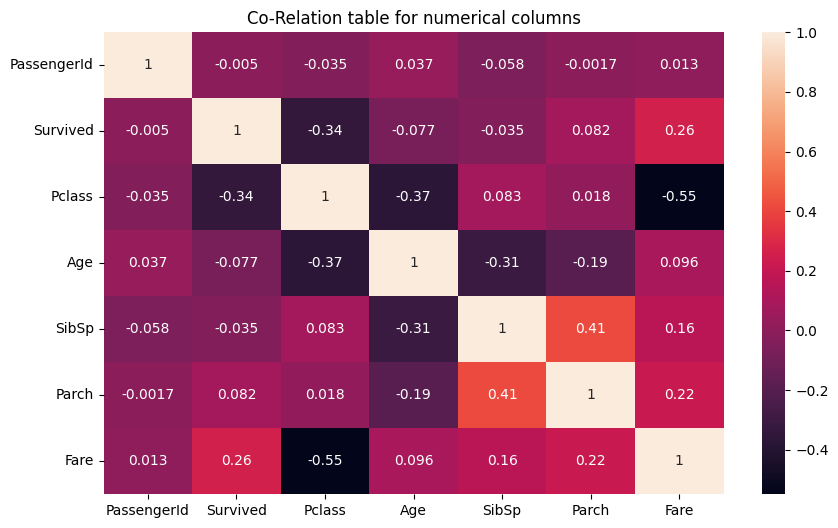

In [73]:
## heatmap
plt.figure(figsize=(10,6))
plt.title('Co-Relation table for numerical columns')
sns.heatmap(num_cols.corr(), annot=True)
plt.show()

In [74]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to store column names with high correlation
    corr_matrix = dataset.corr()  # Calculate correlation matrix
    
    for i in range(len(corr_matrix.columns)):  # Loop through columns
        for j in range(i):  # Loop through rows before the diagonal
            if abs(corr_matrix.iloc[i, j]) >= threshold:  # Access with iloc
                col_name = corr_matrix.columns[i]  # Get the column name
                col_corr.add(col_name)  # Add the column name to the set
    return col_corr

In [75]:
## let's check the multi-colinearity for the above numerical columns
threshold_values = [0.60,0.50,0.40,0.30]
print('*'*50)
for i in threshold_values:
    print(f'For threshold value = {i}')
    print(f'There are {len(correlation(num_cols, i))}')
    print(f'With columns : \n {correlation(num_cols, i)}')
    print('*'*50)

**************************************************
For threshold value = 0.6
There are 0
With columns : 
 set()
**************************************************
For threshold value = 0.5
There are 1
With columns : 
 {'Fare'}
**************************************************
For threshold value = 0.4
There are 2
With columns : 
 {'Fare', 'Parch'}
**************************************************
For threshold value = 0.3
There are 5
With columns : 
 {'Fare', 'SibSp', 'Age', 'Parch', 'Pclass'}
**************************************************


##### So the mainly related columns are
    Age, SibSp, Parch, Fare and Pclas

In [76]:
## comparing survival rate across Age, SibSp, Parch, Fare and Pclass
surv_rate = pd.pivot_table(data=num_cols, values = ['Age','SibSp', 'Parch', 'Fare', 'Pclass'], index='Survived' )
surv_rate

Age       Fare     Parch    Pclass     SibSp
Survived                                                    
0         30.626179  22.117887  0.329690  2.531876  0.553734
1         28.343690  48.395408  0.464912  1.950292  0.473684

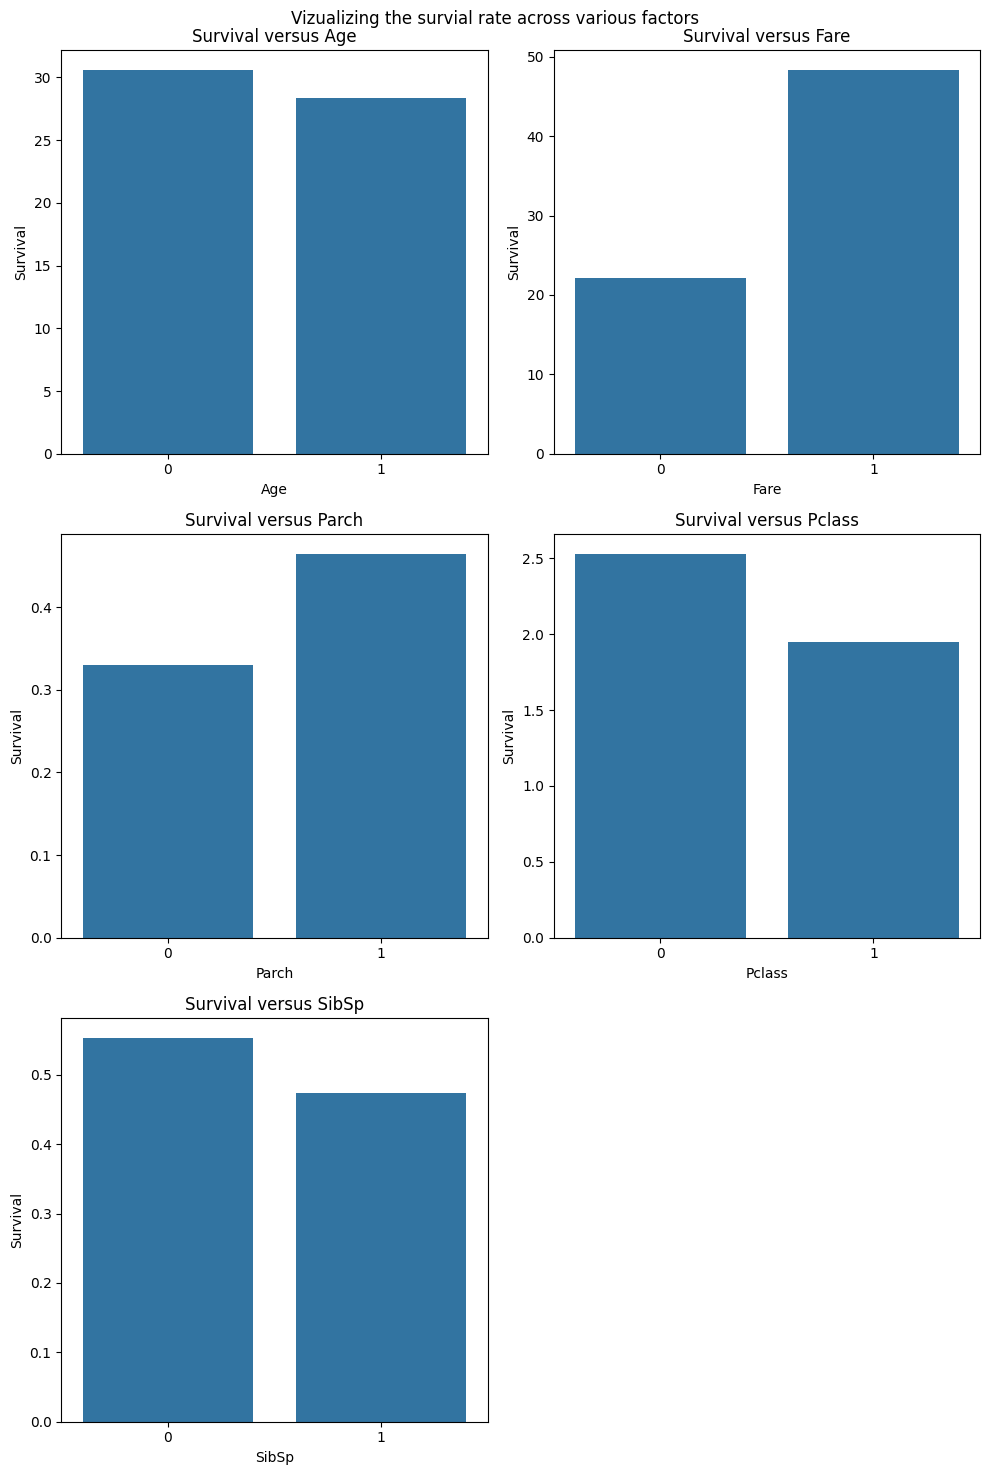

In [77]:
## Let's vizualize the survial rate across various values
plt.figure(figsize=(10,15))
plt.suptitle('Vizualizing the survial rate across various factors')
for idx, col in enumerate(surv_rate.columns, 1):
    plt.subplot(3, 2, idx)
    plt.title(f'Survival versus {col}')
    sns.barplot(data=surv_rate, x=surv_rate.index, y=surv_rate[col])
    plt.xlabel(f'{col}')
    plt.ylabel('Survival')
plt.tight_layout()
plt.show()

## Categorical Columns

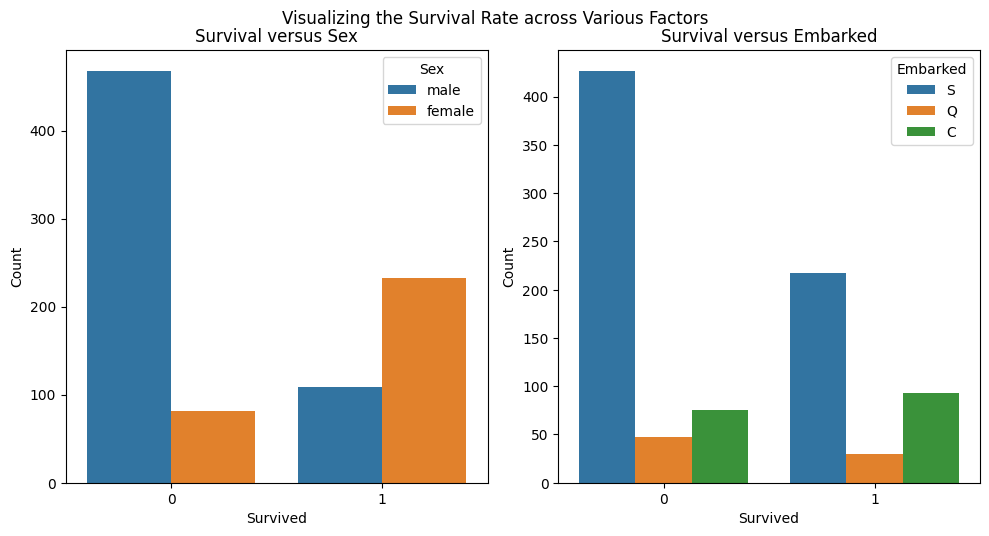

In [78]:
## Let's vizualize the survial rate across various values

# Specify the columns to plot
new_cols = ['Sex', 'Embarked']  # 'Ticket' and 'Cabin' are not directly plottable due to unique values

plt.figure(figsize=(10, 15))
plt.suptitle('Visualizing the Survival Rate across Various Factors')

for idx, col in enumerate(new_cols, 1):
    plt.subplot(3, 2, idx)
    plt.title(f'Survival versus {col}')
    
    # Plot the count of each category for Survived and Not Survived
    sns.countplot(data=df, x='Survived', hue=col)
    
    plt.xlabel('Survived')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()


## Feature Engineering

In [79]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [80]:
## let's drop un-necessary columns
df.drop(columns=['PassengerId'], inplace=True)
df.head(2)

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   

      Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0    male  22.0      1      0  A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0   PC 17599  71.2833   C85        C

In [81]:
## Let's check each of the columns for distinct categories
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [82]:
df['cabin_multiple'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' '))) ## checks if the cabin is null and if not, it will split the string and it will put number of cabin assigned to the person
df['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [83]:
## survival rate based on multiple cabins
pd.pivot_table(data=df, columns = ['cabin_multiple'], index='Survived', values='Ticket', aggfunc='count')

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0

## Data Pre-Processing

In [84]:
df.head(3)

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   

   cabin_multiple  
0               0  
1               1  
2               0

In [85]:
## drop un-wanted columns
df.drop(columns=['Name','Ticket','Cabin'], inplace=True)
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

   cabin_multiple  
0               0  
1               1  
2               0  
3               1  
4               0

In [86]:
df.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age               177
SibSp               0
Parch               0
Fare                0
Embarked            2
cabin_multiple      0
dtype: int64

In [87]:
## droping the null values present in Embarked
df.dropna(subset=['Embarked'], inplace=True)

In [88]:
## checking the shape of the dataset
print(f'The shape of the dataset is {df.shape}')

The shape of the dataset is (889, 9)


In [89]:
## replacing the mean of the age with null-values
mean_age = np.mean(df['Age'])
print(f'The mean age is {mean_age}' )
df.Age = df.Age.fillna(mean_age)
print('replaced')

The mean age is 29.64209269662921
replaced


In [90]:
df.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
cabin_multiple    0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Pclass          889 non-null    int64  
 2   Sex             889 non-null    object 
 3   Age             889 non-null    float64
 4   SibSp           889 non-null    int64  
 5   Parch           889 non-null    int64  
 6   Fare            889 non-null    float64
 7   Embarked        889 non-null    object 
 8   cabin_multiple  889 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [92]:
categorical_columns = df.select_dtypes(include='object')
## check the unique values in each of the categorical colums
for i in categorical_columns.columns:
    print('='*50)
    print('Value Count for')
    print(df[i].value_counts())
    print('='*50)

Value Count for
Sex
male      577
female    312
Name: count, dtype: int64
Value Count for
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [93]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ['Sex', 'Embarked']

# Initialize a dictionary to store encoders for each column
encoders = {}

# Replace original columns with their encoded values
for col in columns_to_encode:
    df[col] = df[col].astype(str)  # Convert all values to strings
    le = LabelEncoder()  # Create a LabelEncoder instance
    df[col] = le.fit_transform(df[col])  # Replace the original column with encoded values
    encoders[col] = le  # Store the encoder for future use (optional)



In [94]:
## let's again check for the value counts
## check the unique values in each of the categorical colums
for i in categorical_columns.columns:
    print('='*50)
    print('Value Count for')
    print(df[i].value_counts())
    print('='*50)

Value Count for
Sex
1    577
0    312
Name: count, dtype: int64
Value Count for
Embarked
2    644
0    168
1     77
Name: count, dtype: int64


In [95]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0         0       3    1  22.0      1      0   7.2500         2   
1         1       1    0  38.0      1      0  71.2833         0   
2         1       3    0  26.0      0      0   7.9250         2   
3         1       1    0  35.0      1      0  53.1000         2   
4         0       3    1  35.0      0      0   8.0500         2   

   cabin_multiple  
0               0  
1               1  
2               0  
3               1  
4               0

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Pclass          889 non-null    int64  
 2   Sex             889 non-null    int32  
 3   Age             889 non-null    float64
 4   SibSp           889 non-null    int64  
 5   Parch           889 non-null    int64  
 6   Fare            889 non-null    float64
 7   Embarked        889 non-null    int32  
 8   cabin_multiple  889 non-null    int64  
dtypes: float64(2), int32(2), int64(5)
memory usage: 62.5 KB


## Data Splitting

In [97]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0         0       3    1  22.0      1      0   7.2500         2   
1         1       1    0  38.0      1      0  71.2833         0   
2         1       3    0  26.0      0      0   7.9250         2   
3         1       1    0  35.0      1      0  53.1000         2   
4         0       3    1  35.0      0      0   8.0500         2   

   cabin_multiple  
0               0  
1               1  
2               0  
3               1  
4               0

In [98]:
## splitting the data into independent and dependent features
x = df.iloc[:,1:] # independent features
y = df.Survived # dependent features

In [99]:
## splititng the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42) ## taking the test_size=33%
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((595, 8), (294, 8), (595,), (294,))

## Standardizing Data

In [100]:
## importing standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initializing standard scaler
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Models

In [101]:
## importing different models
from sklearn.linear_model import LogisticRegression       # Logistic Regression
from sklearn.tree import DecisionTreeClassifier           # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier       # Random Forest Classifier
from sklearn.ensemble import AdaBoostClassifier           # Adaboost Classifier
from sklearn.ensemble import GradientBoostingClassifier   # Gradient Boosting Classifier
from xgboost import XGBClassifier                         # Extra Gradient Boosting Classifier

## evaluation libraries
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score 

In [102]:
## Function for evalution of the models
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    return accuracy, f1, precision, recall

In [114]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Adaboost Classifier' : AdaBoostClassifier(),
    'Gradient Boost Classifier' : GradientBoostingClassifier(),
    'XG Boost Classifier' : XGBClassifier()
}

# for i in range(len(list(models))):
#     model = list(models.values())[i]
#     model.fit(x_train, y_train)

#     # Make predictions
#     y_train_pred = model.predict(x_train)
#     y_test_pred = model.predict(x_test)

#     # Evaluate train and test dataset
#     model_train_accuracy, model_train_f1, model_train_precision, model_train_recall = evaluate_model(y_train, y_train_pred)
#     model_test_accuracy, model_test_f1, model_test_precision, model_test_recall = evaluate_model(y_test, y_test_pred)

#     print('=' * 50)
#     print(list(models.keys())[i])
#     print('-' * 50)
#     print('Model Performance for Training Set')
#     print('-' * 50)
#     print(f'Accuracy Score: {np.round(model_train_accuracy, 2)}')
#     print(f'F1 Score: {np.round(model_train_f1, 2)}')
#     print(f'Precision Score: {np.round(model_train_precision, 2)}')
#     print(f'Recall Score: {np.round(model_train_recall, 2)}')
#     print('-' * 50)
#     print('Model Performance for Testing Set')
#     print('-' * 50)
#     print(f'Accuracy Score: {np.round(model_test_accuracy, 2)}')
#     print(f'F1 Score: {np.round(model_test_f1, 2)}')
#     print(f'Precision Score: {np.round(model_test_precision, 2)}')
#     print(f'Recall Score: {np.round(model_test_recall, 2)}')
#     print('=' * 50)

# Initialize a list to store the results
results = []

# Iterate over the models
for model_name, model in models.items():
    model.fit(x_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate train and test dataset
    model_train_accuracy, model_train_f1, model_train_precision, model_train_recall = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_f1, model_test_precision, model_test_recall = evaluate_model(y_test, y_test_pred)
    
    # Append the results
    results.append({
        'Model': model_name,
        'Train Accuracy': np.round(model_train_accuracy, 2),
        'Test Accuracy': np.round(model_test_accuracy, 2),
        'Train F1 Score': np.round(model_train_f1, 2),
        'Test F1 Score': np.round(model_test_f1, 2),
        'Train Precision': np.round(model_train_precision, 2),
        'Test Precision': np.round(model_test_precision, 2),
        'Train Recall': np.round(model_train_recall, 2),
        'Test Recall': np.round(model_test_recall, 2)    
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

Model  Train Accuracy  Test Accuracy  Train F1 Score  \
0        Logistic Regression            0.79           0.81            0.72   
1              Decision Tree            0.99           0.76            0.99   
2              Random Forest            0.99           0.78            0.99   
3        Adaboost Classifier            0.85           0.81            0.80   
4  Gradient Boost Classifier            0.91           0.80            0.87   
5        XG Boost Classifier            0.98           0.79            0.98   

   Test F1 Score  Train Precision  Test Precision  Train Recall  Test Recall  
0           0.75             0.74            0.73          0.70         0.76  
1           0.68             1.00            0.67          0.98         0.68  
2           0.70             1.00            0.72          0.98         0.68  
3           0.76             0.81            0.74          0.79         0.78  
4           0.72             0.93            0.76          0.83         0.69  
5           0.71             0.99            0.72          0.97         0.70

So, from the above metrics we can finally say that, Adaboost Classifier and Logistic Regression has the higher accuracy rate.

## Hyper-Prameter Tunning

In [ ]:
adb = AdaBoostClassifier()
lgr = LogisticRegression()

In [108]:
## taking the parameters for the models
ada_boost_params = {
    'learning_rate' : [0.1, 0.2, 0,5, 0.8, 0.9, 1.0],
    'n_estimators' : [100, 200, 300, 500, 700, 800, 1000],
    'algorithm' : ['SAMME', 'SAMME.R']
}
log_reg_params = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'max_iter' : [100, 200, 400, 500, 600, 900, 1000],
    'C' : [0.1, 0.2, 0.5, 0.9, 1.0],
    'solver' : ['lbfgs', 'sag', 'newton-cg']
}

In [109]:
## using grid search cv
from sklearn.model_selection import GridSearchCV
grid_models = [
    ('Logistic Regression Classification', LogisticRegression(), log_reg_params),
    ('AdaBoost Classifier', AdaBoostClassifier(), ada_boost_params)
]

In [110]:
## importing cross-validation and cross-validation-score 
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5,shuffle= True, random_state=42) ## initializing k-folds cross validation

In [111]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
model_params = {}
for name, model, params in grid_models:
    grid = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                cv=kf,
                                n_jobs=-1
                               )
    grid.fit(x_train,y_train)
    model_params[name] = grid.best_params_


In [113]:
for model_name in model_params:
    print(f'----------------Best Params for {model_name}-----------------------')
    print(model_params[model_name])
    

----------------Best Params for Logistic Regression Classification-----------------------
{'solver': 'sag', 'penalty': 'l2', 'max_iter': 900, 'C': 0.1}
----------------Best Params for AdaBoost Classifier-----------------------
{'n_estimators': 100, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}


In [117]:
## checking the accuracy with the best parameters
models = {
    'Logistic Regression' : LogisticRegression(penalty='l2',max_iter=900, solver='sag',C=0.1),
    'AdaBoost Classifier' : AdaBoostClassifier(n_estimators=100, learning_rate=0.1, algorithm = 'SAMME.R')
}

# Initialize a list to store the results
results = []

# Iterate over the models
for model_name, model in models.items():
    model.fit(x_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate train and test dataset
    model_train_accuracy, model_train_f1, model_train_precision, model_train_recall = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_f1, model_test_precision, model_test_recall = evaluate_model(y_test, y_test_pred)
    
    # Append the results
    results.append({
        'Model': model_name,
        'Train Accuracy': np.round(model_train_accuracy, 2),
        'Test Accuracy': np.round(model_test_accuracy, 2),
        'Train F1 Score': np.round(model_train_f1, 2),
        'Test F1 Score': np.round(model_test_f1, 2),
        'Train Precision': np.round(model_train_precision, 2),
        'Test Precision': np.round(model_test_precision, 2),
        'Train Recall': np.round(model_train_recall, 2),
        'Test Recall': np.round(model_test_recall, 2)    
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

Model  Train Accuracy  Test Accuracy  Train F1 Score  \
0  Logistic Regression            0.79           0.80            0.72   
1  AdaBoost Classifier            0.82           0.81            0.76   

   Test F1 Score  Train Precision  Test Precision  Train Recall  Test Recall  
0           0.73             0.75            0.73          0.69         0.73  
1           0.75             0.77            0.73          0.76         0.77

##### So from the above metrics AdaBoost Classifier is the best model for classifying the data

In [118]:
## best model
best_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, algorithm = 'SAMME.R')

In [119]:
best_model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [126]:
df.tail()

Survived  Pclass  Sex        Age  SibSp  Parch   Fare  Embarked  \
886         0       2    1  27.000000      0      0  13.00         2   
887         1       1    0  19.000000      0      0  30.00         2   
888         0       3    0  29.642093      1      2  23.45         2   
889         1       1    1  26.000000      0      0  30.00         0   
890         0       3    1  32.000000      0      0   7.75         1   

     cabin_multiple  
886               0  
887               1  
888               0  
889               1  
890               0

In [127]:
new_data = [[2,	1,	27.000000,	0,	0,	13.00,	2,	0]]
std_data = scaler.transform(new_data)
best_model.predict(std_data)

array([0], dtype=int64)

In [130]:
## pickling the model
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(best_model, open('model.pkl', 'wb'))
print('Pickled the models')

Pickled the models
